In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') # Code for stopping warnings (deprecation warning, etc.)
pd.set_option('display.max_columns', None) # Code for showing all columns in the dateset, withoud '...' in between.


# Data Visualization

In [2]:
data = pd.read_csv('../raw_data/people_clean.csv')

In [3]:
data.shape

(1470, 34)

In [4]:
data.head(10)

,employee_id,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,8,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,10,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,11,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,12,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,13,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [5]:
pd.get_dummies(data['business_travel'])

data = pd.concat([data, pd.get_dummies(data['business_travel'])], axis = 1)

data.drop(columns = ['business_travel'], inplace = True)

In [8]:
data

,employee_id,age,attrition,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,Non-Travel,Travel_Frequently,Travel_Rarely
0,1,41,Yes,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1
1,2,49,No,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0
2,4,37,Yes,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1
3,5,33,No,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0
4,7,27,No,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1
5,8,32,No,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,0,1,0
6,10,59,No,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,0,0,1
7,11,30,No,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,0,0,1
8,12,38,No,216,Research & Development,23,3,Life Sciences,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,0,1,0
9,13,36,No,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,0,0,1


# Holdout

In [6]:
## Definir X e Y
X = data[['employee_id','age','daily_rate','distance_from_home','education','environment_satisfaction','hourly_rate','job_involvement','job_level','job_satisfaction','monthly_income','monthly_rate','num_companies_worked','percent_salary_hike','performance_rating','relationship_satisfaction','standard_hours','stock_option_level','total_working_years','training_times_last_year','work_life_balance','years_at_company','years_in_current_role','years_since_last_promotion','years_with_curr_manager']]
Y = data['attrition']

## Separar amostra para teste e treino
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state = 1)

NameError: name 'df' is not defined

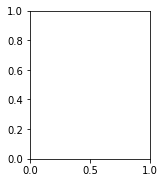

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(2,6,1)
sns.histplot(df['employee_id'], kde=True);
plt.subplot(2,6,2)
sns.histplot(df['age'], kde=True);
plt.subplot(2,6,3)
sns.histplot(df['daily_rate'], kde=True);
plt.subplot(2,6,4)
sns.histplot(df['distance_from_home'], kde=True);
plt.subplot(2,6,5)
sns.histplot(df['education'], kde=True);
plt.subplot(2,6,6)
sns.histplot(df['environment_satisfaction'], kde=True);
plt.subplot(2,6,7)
sns.boxplot(data=df, x='Relative Compactness');
plt.subplot(2,6,8)
sns.boxplot(data=df, x='Surface Area');
plt.subplot(2,6,9)
sns.boxplot(data=df, x='Wall Area');
plt.subplot(2,6,10)
sns.boxplot(data=df, x='Roof Area');
plt.subplot(2,6,11)
sns.boxplot(data=df, x='Overall Height');
plt.subplot(2,6,12)
sns.boxplot(data=df, x='Glazing Area');

# Modeling

In [ ]:
# Instanciate the model
log_model = LogisticRegression()

# # # Train the model on the Training data
log_model.fit(X_train, Y_train)

# # # Score the model on the Training data
log_model.score(X_test,Y_test)

# Improving score